# Current Vector Stack with ADCP Data

For this visualization, we will require the northward and eastward components of the water velocity and the depth of each of these component vectors to generate a 3-dimensional hub and spoke plot.

In [1]:
from yodapy.datasources import OOI
from yodapy.utils import set_credentials_file
import numpy as np

set_credentials_file(data_source='ooi', username='OOIAPI-CHN725DB03M3AC', token='SAFZTAB3M1')

ooi = OOI()

In [2]:
# get the data with the ooi object
asset = ooi.filter(region="coastal endurance",site="oregon shelf surface mooring",instrument="velocity profiler")
asset.view_instruments()

,reference_designator,name,start_depth,end_depth,current_status,preferred_stream,preferred_parameter,location
50,CE02SHSM-RID26-01-ADCPTA000,Velocity Profiler (600kHz),7.0,7.0,,adcp_velocity_earth,,Near Surface Instrument Frame


In [3]:
start = "2017-04-19"
end = "2017-4-21"

req = asset.request_data(
        begin_date = start,
        end_date = end,
        limit = 2,
        data_type = "json")

data = req.raw()[0]["data"][0]

In [4]:
# isolate x/y vectors, cleave if a NaN is found

x = data["eastward_seawater_velocity"]
y = data["northward_seawater_velocity"]

def find_nan(arr):
    for i in range(0,len(arr)):
        if np.isnan(arr[i]):
            return i
    return -1

nan_i = min([find_nan(x), find_nan(y)])

if nan_i != -1:
    x = x[:nan_i]
    y = y[:nan_i]

print("   E/W  |   N/S ")
print("================")
for a,b in zip(x,y):
    print("%-7.4f | %7.4f" % (a,b))

   E/W  |   N/S 
0.0387  |  0.1148
0.0125  |  0.1324
0.0131  |  0.1613
-0.0007 |  0.1412
0.0285  |  0.1456
0.0177  |  0.1289
0.0258  |  0.1091
0.0271  |  0.1139
0.0096  |  0.0689
0.0159  |  0.1222
0.0108  |  0.1111
0.0242  |  0.1147
0.0127  |  0.1220
0.0238  |  0.1210
0.0346  |  0.1149
0.0296  |  0.1267
0.0404  |  0.1362
0.0265  |  0.1420
0.0391  |  0.1313
0.0374  |  0.1401
0.0328  |  0.1424
0.0105  |  0.1101
0.0125  |  0.0795
-0.0115 |  0.1017
0.0081  |  0.1129
-0.0221 |  0.0973
-0.0063 |  0.1096
0.0071  |  0.1090
-0.0153 |  0.1182
-0.0360 |  0.1146
-0.0419 |  0.1193
-0.0504 |  0.1186
-0.0426 |  0.1133
-0.0398 |  0.0970
-0.0604 |  0.0974
-0.0514 |  0.1188
-0.0532 |  0.1276
-0.0611 |  0.1101
-0.0578 |  0.1030
-0.0815 |  0.1188
-0.0656 |  0.1238
-0.0908 |  0.1265
-0.0693 |  0.1217
-0.0441 |  0.1075
-0.0803 |  0.1081
-0.0462 |  0.1454
-0.0580 |  0.1289
-0.0226 |  0.1483
0.0196  |  0.2113


Now we need to resolve the z-axis. For this dataset, how deep is each bin and how tall will the total stack be? Fortunately, a bin_depths array makes this easy. And, for easier viewing, we multiply each value by -1 to reorient our view as if the observer stood above the water column looking downward.

In [5]:
# cleave extra bin depths as we did with the nans
depths = data["bin_depths"][:len(x)]
# flip it over
depths = [i * -1 for i in depths]

Finally, we plot our figure with Quiver3D

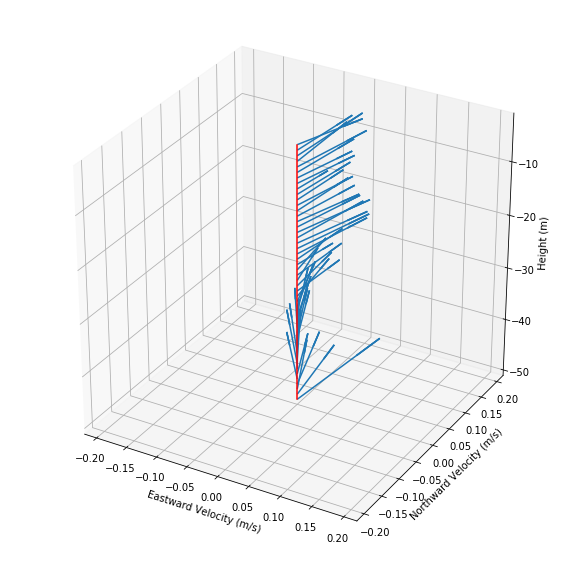

In [7]:
# set up figure
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

# make it pretty and scaled for our data
ax = fig.add_subplot(111, projection='3d')
max_xy = max(np.absolute(x + y))
# number bins is equal to the length of any of the datatype lists
ax.set_xlim(-max_xy,max_xy)
ax.set_ylim(-max_xy,max_xy)
ax.set_zlim(min(depths), max(depths))
ax.set_xlabel("Eastward Velocity (m/s)")
ax.set_ylabel("Northward Velocity (m/s)")
ax.set_zlabel("Height (m)")

# plot current vectors
ax.quiver(0,0,depths,x,y,0)

# plot central axis
zeros = [0 for d in depths]
ax.plot(zeros,zeros,depths,color="red")